In [155]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])
    plt.show()
from nltk.corpus import PlaintextCorpusReader
from nltk.corpus.reader import CHILDESCorpusReader
import numpy as np
import pandas as pd
from pandas import DataFrame
from nltk.probability import FreqDist
import string
from nltk.stem.wordnet import WordNetLemmatizer

import matplotlib.pyplot as plt
from scipy import stats
import itertools

from scipy import optimize
from scipy.optimize import curve_fit
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import log as ln
import tensorflow_addons as tfa

import powerlaw

import numpy
import math
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation,Flatten
from keras.layers import LSTM, Bidirectional
from tensorflow.keras.layers import Embedding, TimeDistributed
from keras.layers import Conv1D,Conv2D, GlobalMaxPooling1D, GlobalMaxPooling2D
from keras.initializers import Constant
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.ticker as ticker
from sklearn.model_selection import StratifiedKFold,train_test_split

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from tqdm._tqdm_notebook import tqdm_notebook
import gensim

tqdm_notebook.pandas()

/Users/Ershui13/opt/anaconda3/lib/python3.7/site-packages/tqdm/std.py:648: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [4]:
df = pd.read_csv('/Users/Ershui13/Desktop/AES-Project/TOEFL_11/Essay_list.csv')
label_encoder = LabelEncoder()
integer_encoded =label_encoder.fit_transform(df['Score Level'])
onehot_encoder = OneHotEncoder(sparse = False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [25]:
df.loc[(df['Score Level'] == 'high'), 'Encoded_Level'] = 2
df.loc[(df['Score Level'] == 'medium'), 'Encoded_Level'] = 1
df.loc[(df['Score Level'] == 'low'), 'Encoded_Level'] = 0

In [26]:
df.head()

,Unnamed: 0,Filename,Prompt,Language,Score Level,Prompt_text,Essay,Encoded_Level
0,0,88.txt,P6,KOR,high,The best way to travel is in a group led by a ...,Some people might think that traveling in a gr...,2
1,1,278.txt,P6,DEU,medium,The best way to travel is in a group led by a ...,IThe importance and popularity of travelling i...,1
2,2,348.txt,P1,TUR,high,It is better to have broad knowledge of many a...,"It is an important decision, how to plan your ...",2
3,3,666.txt,P2,ZHO,medium,Young people enjoy life more than older people...,Some people believe that young people can enjo...,1
4,4,733.txt,P6,TEL,medium,The best way to travel is in a group led by a ...,Travelling is usually considered as good recr...,1


In [27]:
Essays = df['Essay'].values
Labels = df['Encoded_Level'].values

In [10]:
EMBEDDING_DIM = 128
vocab_size =  83226

In [12]:
essay_line = list()
for essay in Essays:
    tokens = word_tokenize(essay.replace('\n',''))
    tokens = [w.lower() for w in tokens]
    table = str.maketrans('','', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    words = [word for word in stripped if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    essay_line.append(words)

In [57]:
print(len(essay_line))
print(essay_line[0])

12100
['people', 'might', 'think', 'traveling', 'group', 'led', 'tour', 'guide', 'good', 'way', 'group', 'tour', 'normally', 'strict', 'schedule', 'offer', 'tourists', 'group', 'chance', 'meet', 'many', 'people', 'new', 'place', 'strongly', 'disagree', 'statement', 'best', 'way', 'travel', 'group', 'led', 'tour', 'guide', 'first', 'group', 'tour', 'strict', 'schedule', 'tour', 'team', 'members', 'follow', 'means', 'choose', 'place', 'want', 'go', 'food', 'want', 'eat', 'example', 'went', 'thailand', 'first', 'time', 'chose', 'group', 'tour', 'young', 'first', 'time', 'go', 'abroad', 'really', 'wanted', 'go', 'many', 'attractive', 'shops', 'spots', 'street', 'bangkok', 'could', 'nt', 'go', 'group', 'tour', 'follow', 'schedule', 'tour', 'company', 'offered', 'wake', 'early', 'morning', 'go', 'back', 'hotel', 'early', 'evening', 'even', 'though', 'wanted', 'enjoy', 'sleep', 'bed', 'morning', 'wanted', 'go', 'outside', 'night', 'really', 'bad', 'experience', 'second', 'group', 'tour', 'off

In [58]:
EMBEDDING_DIM = 128
#train word2vec model
model = gensim.models.Word2Vec(sentences = essay_line, size = EMBEDDING_DIM, window = 5, workers = 4, min_count = 1)
#vocab size
words = list(model.wv.vocab)
print('Vocab size: %d' %len(words))

Vocab size: 83225


In [67]:
model.wv.save_word2vec_format('Essay_embedding_word2vec.tsv')

In [95]:
embeddings_index

{'83225': array(['128'], dtype='<U3'),
 'people': array(['1.1229135', '-1.2552187', '-0.99515086', '-0.12841068',
        '0.23437992', '-0.44853598', '0.483581', '-0.26302865',
        '-1.3618536', '2.2070706', '-1.2938806', '-0.66924083',
        '-0.20254074', '-0.10572996', '0.9662552', '-0.19432256',
        '0.31403562', '0.5704045', '-0.12312748', '0.060083907',
        '-0.653183', '-1.3130387', '0.05026582', '-0.84497744',
        '-0.34012538', '-0.34800074', '-2.692633', '-0.3481505',
        '2.9467402', '0.13371398', '1.084639', '-0.32974344',
        '-0.17441045', '-2.3453867', '0.9408774', '1.6954707',
        '0.52247584', '-0.6183244', '-0.27925', '1.3467356', '0.7961193',
        '0.6843258', '-0.32997736', '-0.11334898', '-1.379151',
        '-0.55403584', '-0.42062628', '-1.5399994', '0.4012422',
        '-0.5510346', '0.7759287', '-1.2208158', '-0.7687688', '1.3368243',
        '0.428919', '-1.4349524', '-0.9979768', '-0.59888184',
        '-0.8283924', '0.893579

In [137]:
import os
embeddings_index = {}
f = open(os.path.join('','Essay_embedding_word2vec.txt'), encoding = "utf-8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:],dtype = 'float32')
    embeddings_index[word] = coefs
f.close

<function TextIOWrapper.close()>

In [13]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(essay_line)
sequences = tokenizer.texts_to_sequences(essay_line)
max_length = 600
vocab_size = len(tokenizer.word_index)+1
word_index = tokenizer.word_index
print('Found %s unique tokens.' %len(word_index))
essay_pad = pad_sequences(sequences, maxlen = 600, padding = 'post', truncating = 'post')
print('shape of essay tensor:', essay_pad.shape)
print('shape of score tensor:',Labels.shape )

Found 83225 unique tokens.
shape of essay tensor: (12100, 600)
shape of score tensor: (12100,)


In [138]:
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
    #if i > vocab_size:
        #continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [171]:
X_train, X_test, y_train, y_test = train_test_split(essay_pad, Labels, test_size = 0.2, random_state = 3)
print('shape of X_train:', X_train.shape)
print('shape of X_test:', X_test.shape)
print('shape of y_train:', y_train.shape)
print('shape of y_test:', y_test.shape)

shape of X_train: (9680, 600)
shape of X_test: (2420, 600)
shape of y_train: (9680,)
shape of y_test: (2420,)


In [174]:
model = Sequential()
embedding_layer = Embedding(vocab_size,
                           EMBEDDING_DIM,
                           embeddings_initializer=keras.initializers.Constant(embedding_matrix),
                           input_length = 600,
                           trainable = False)

model.add(embedding_layer)
#model.add(Conv1D(128,3,padding='valid',activation='relu', strides=1))
#model.add(GlobalMaxPooling1D())
model.add(Flatten())
#model.add(LSTM(128))
#model.add(Dense(256, activation = 'relu'))
model.add(Dense(3, activation = 'sigmoid'))
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy','mse','mae'])

model.summary()

TypeError: The added layer must be an instance of class Layer. Found: <tensorflow.python.keras.layers.embeddings.Embedding object at 0x14e8ca6d0>

### Model1. CNN with pre trained word embedding

In [175]:
##Use a CNN layer with pre-trained word embedding
embedding_layer = Embedding(vocab_size,
                           EMBEDDING_DIM,
                           embeddings_initializer=keras.initializers.Constant(embedding_matrix),
                           trainable = False)
int_sequences_input = keras.Input(shape = (None,),dtype = "int64")
embedded_sequences = embedding_layer(int_sequences_input)
x = layers.Conv1D(128,5,activation='relu')(embedded_sequences)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(128,5,activation='relu')(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dense(256, activation = 'relu')(x)
preds = layers.Dense(3,activation = 'softmax')(x)
model = keras.Model(int_sequences_input, preds)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_2 (Embedding)      (None, None, 128)         10652928  
_________________________________________________________________
conv1d_2 (Conv1D)            (None, None, 128)         82048     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, None, 128)         0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, None, 128)         82048     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               3302

In [176]:
model.compile(
    loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy','mse','mae']
)

In [178]:
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
tqdm_callback = tfa.callbacks.TQDMProgressBar()
history = model.fit(X_train, y_train, 
                    validation_split = 0.2,
                    epochs=10,  
                    batch_size=128,
                    verbose=0,
                   callbacks =[tqdm_callback])

Epoch 1/10



Epoch 2/10



Epoch 3/10



Epoch 4/10



Epoch 5/10



Epoch 6/10



Epoch 7/10



Epoch 8/10



Epoch 9/10



Epoch 10/10


ValueError: x and y must have same first dimension, but have shapes (10,) and (17,)

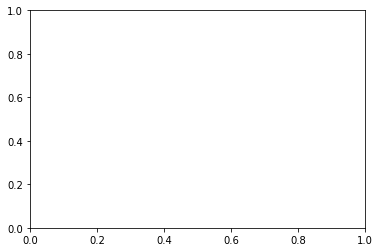

In [185]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

plotter.plot({'accuracy': history}, metric = 'accuracy')
plt.ylim([0, 1])
plt.ylabel('accuracy')

In [179]:
loss, accuracy ,mae, mse = model.evaluate(X_test, y_test, verbose=2)
print("Test set loss: {:5.2f} , accuracy: {:5.2f}, mae: {:5.2f}, mse: {:5.2f}  ".format(loss, accuracy, mae, mse))

2420/2420 - 4s - loss: 1.1707 - accuracy: 0.6636 - mse: 1.3748 - mae: 0.9723
Test set loss:  1.17 , accuracy:  0.66, mae:  1.37, mse:  0.97  


In [181]:
from sklearn import metrics
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)

target_names = ['low', 'medium', 'high']
print(metrics.classification_report(y_test, y_pred, digits=3, target_names=target_names))

from sklearn.metrics import confusion_matrix, cohen_kappa_score
print('QWK {:5.5f}'.format(cohen_kappa_score(y_test, y_pred, weights='quadratic')))


              precision    recall  f1-score   support

         low      0.693     0.496     0.578       268
      medium      0.664     0.782     0.718      1323
        high      0.655     0.530     0.586       829

    accuracy                          0.664      2420
   macro avg      0.671     0.602     0.627      2420
weighted avg      0.664     0.664     0.657      2420

QWK 0.52975


### Model 2. CNN + LTSM

In [16]:
print('Accuracy: %f' % (accuracy*100))

Accuracy: 100.000000


In [ ]:
model = Sequential()
embedding_layer = Embedding(vocab_size,
                           EMBEDDING_DIM,
                           embeddings_initializer=keras.initializers.Constant(embedding_matrix),
                           input_length = 600,
                           trainable = False)

model.add(embedding_layer)
#model.add(Conv1D(128,3,padding='valid',activation='relu', strides=1))
#model.add(GlobalMaxPooling1D())
model.add(Flatten())
#model.add(LSTM(128))
#model.add(Dense(256, activation = 'relu'))
model.add(Dense(3, activation = 'sigmoid'))
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy','mse','mae'])

model.summary()

In [194]:
embedding_layer = Embedding(vocab_size,
                           EMBEDDING_DIM,
                           embeddings_initializer=keras.initializers.Constant(embedding_matrix),
                           trainable = False)
int_sequences_input = keras.Input(shape = (None,),dtype = "int64")
embedded_sequences = embedding_layer(int_sequences_input)
x = layers.Conv1D(128,5,activation='relu')(embedded_sequences)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(128,5,activation='relu')(x)
x = layers.LSTM(128,return_sequences = True)(x)
x = layers.Dropout((0.2))(x)
x = layers.LSTM(256)(x)
x = layers.Dense(128, activation = 'relu')(x)
preds = layers.Dense(3,activation = 'softmax')(x)
model = keras.Model(int_sequences_input, preds)
model.compile(optimizer='rmsprop',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy','mse','mae'])

model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, None)]            0         
_________________________________________________________________
embedding_8 (Embedding)      (None, None, 128)         10652928  
_________________________________________________________________
conv1d_14 (Conv1D)           (None, None, 128)         82048     
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, None, 128)         0         
_________________________________________________________________
conv1d_15 (Conv1D)           (None, None, 128)         82048     
_________________________________________________________________
lstm_6 (LSTM)                (None, None, 128)         131584    
_________________________________________________________________
dropout (Dropout)            (None, None, 128)         0   

In [195]:
tqdm_callback = tfa.callbacks.TQDMProgressBar()
history = model.fit(X_train, y_train, 
                    validation_split = 0.2,
                    epochs=20,  
                    batch_size=128,
                    verbose=0,
                   callbacks =[tqdm_callback])

Epoch 1/20



Epoch 2/20



Epoch 3/20



Epoch 4/20



Epoch 5/20



Epoch 6/20



Epoch 7/20



Epoch 8/20



Epoch 9/20



Epoch 10/20



Epoch 11/20



Epoch 12/20



Epoch 13/20



Epoch 14/20



Epoch 15/20



Epoch 16/20



Epoch 17/20



Epoch 18/20



Epoch 19/20



Epoch 20/20


In [196]:
loss, accuracy ,mae, mse = model.evaluate(X_test, y_test, verbose=2)
print("Test set loss: {:5.2f} , accuracy: {:5.2f}, mae: {:5.2f}, mse: {:5.2f}  ".format(loss, accuracy, mae, mse))

2420/2420 - 18s - loss: 0.6521 - accuracy: 0.7169 - mse: 1.3171 - mae: 0.9723
Test set loss:  0.65 , accuracy:  0.72, mae:  1.32, mse:  0.97  


In [197]:
from sklearn import metrics
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)

target_names = ['low', 'medium', 'high']
print(metrics.classification_report(y_test, y_pred, digits=3, target_names=target_names))

from sklearn.metrics import confusion_matrix, cohen_kappa_score
print('QWK {:5.5f}'.format(cohen_kappa_score(y_test, y_pred, weights='quadratic')))


              precision    recall  f1-score   support

         low      0.785     0.519     0.625       268
      medium      0.763     0.704     0.733      1323
        high      0.650     0.801     0.717       829

    accuracy                          0.717      2420
   macro avg      0.733     0.675     0.692      2420
weighted avg      0.727     0.717     0.716      2420

QWK 0.63240


### Model 3. Multiple layers of CNN and LSTM

In [226]:
embedding_layer = Embedding(vocab_size,
                           EMBEDDING_DIM,
                           embeddings_initializer=keras.initializers.Constant(embedding_matrix),
                           trainable = False)
int_sequences_input = keras.Input(shape = (None,),dtype = "int64")
embedded_sequences = embedding_layer(int_sequences_input)
x = layers.Conv1D(128,6,activation='relu')(embedded_sequences)
x = layers.MaxPooling1D(6)(x)
x = layers.Conv1D(128,6,activation='relu')(x)
x = layers.MaxPooling1D(6)(x)
x = layers.Conv1D(128,6,activation='relu')(x)
x = layers.LSTM(128,return_sequences = True)(x)
x = layers.LSTM(256,return_sequences = True)(x)
x = layers.LSTM(128,return_sequences = True)(x)
x = layers.LSTM(256,return_sequences = True)(x)
x = layers.LSTM(128,return_sequences = True)(x)
x = layers.LSTM(256,return_sequences = True)(x)
x = layers.LSTM(128,return_sequences = True)(x)
x = layers.LSTM(256,return_sequences = True)(x)
x = layers.Dropout((0.2))(x)
x = layers.LSTM(128)(x)
x = layers.Dense(128, activation = 'relu')(x)
preds = layers.Dense(3,activation = 'softmax')(x)
model = keras.Model(int_sequences_input, preds)
model.compile(optimizer='rmsprop',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

model.summary()


Model: "model_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_26 (InputLayer)        [(None, None)]            0         
_________________________________________________________________
embedding_24 (Embedding)     (None, None, 128)         10652928  
_________________________________________________________________
conv1d_90 (Conv1D)           (None, None, 128)         98432     
_________________________________________________________________
max_pooling1d_66 (MaxPooling (None, None, 128)         0         
_________________________________________________________________
conv1d_91 (Conv1D)           (None, None, 128)         98432     
_________________________________________________________________
max_pooling1d_67 (MaxPooling (None, None, 128)         0         
_________________________________________________________________
conv1d_92 (Conv1D)           (None, None, 128)         984

In [227]:
tqdm_callback = tfa.callbacks.TQDMProgressBar()
history = model.fit(X_train, y_train, 
                    validation_split = 0.2,
                    epochs=20,  
                    batch_size=128,
                    verbose=0,
                   callbacks =[tqdm_callback])

Epoch 1/20



Epoch 2/20



Epoch 3/20



Epoch 4/20



Epoch 5/20



Epoch 6/20



Epoch 7/20



Epoch 8/20



Epoch 9/20



Epoch 10/20



Epoch 11/20



Epoch 12/20



Epoch 13/20



Epoch 14/20



Epoch 15/20



Epoch 16/20



Epoch 17/20



Epoch 18/20



Epoch 19/20



Epoch 20/20


In [229]:
loss, accuracy  = model.evaluate(X_test, y_test, verbose=2)
print("Test set loss: {:5.2f} , accuracy: {:5.2f} ".format(loss, accuracy))

2420/2420 - 9s - loss: 1.4730 - accuracy: 0.6645
Test set loss:  1.47 , accuracy:  0.66 


In [230]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)

target_names = ['low', 'medium', 'high']
print(metrics.classification_report(y_test, y_pred, digits=3, target_names=target_names))

print('QWK {:5.5f}'.format(cohen_kappa_score(y_test, y_pred, weights='quadratic')))


              precision    recall  f1-score   support

         low      0.606     0.545     0.574       268
      medium      0.701     0.693     0.697      1323
        high      0.626     0.657     0.641       829

    accuracy                          0.664      2420
   macro avg      0.644     0.632     0.637      2420
weighted avg      0.665     0.664     0.664      2420

QWK 0.55293
